In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix
from sklearn import metrics  
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Step 1: Load the dataset
df = pd.read_csv("Diabetes_Dataset.csv")

In [4]:
# Step 2: Data Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [5]:
# Scaling numeric features
scaler = StandardScaler()
numeric_features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'Pregnancies', 'blood_pressure', 'genetic', 'cholesterol']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
df[numeric_features] = scaler.inverse_transform(df[numeric_features])
df.head(10)  # After reversing scaling

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  32.0             0              0                0  27.32   
1       0  29.0             0              0                0  19.95   
2       1  18.0             0              0                0  23.76   
3       1  41.0             0              0                0  27.32   
4       0  52.0             0              0                0  23.75   
5       1  66.0             0              0                2  27.32   
6       0  49.0             0              0                1  24.34   
7       0  15.0             0              0                0  20.98   
8       1  51.0             0              0                0  38.14   
9       1  42.0             0              0                0  27.32   

   hbA1c_level  blood_glucose_level  Pregnancies  blood_pressure  genetic  \
0          5.0                100.0          1.0           102.0      1.0   
1          5.0                 90.0          1.0            92.0      0.0   
2          4.8                160.0          0.0            96.0      0.0   
3          4.0                159.0          0.0           128.0      1.0   
4          6.5                 90.0          1.0            95.0      1.0   
5          5.7                159.0          0.0           124.0      0.0   
6          5.7                 80.0          1.0           119.0      0.0   
7          5.0                155.0          0.0           113.0      0.0   
8          6.0                100.0          0.0           129.0      1.0   
9          5.7                160.0          0.0           110.0      0.0   

   cholesterol  diabetes  
0        249.0         1  
1        201.0         0  
2        225.0         0  
3        246.0         1  
4        159.0         1  
5        213.0         0  
6        171.0         0  
7        244.0         0  
8        159.0         1  
9        196.0         0

In [7]:
df.groupby("diabetes").agg({"gender":"mean"})

gender
diabetes          
0         0.409629
1         0.438030

In [8]:
df.groupby("diabetes").agg({"age":"mean"})

age
diabetes           
0         41.679200
1         52.965873

In [9]:
df.groupby("diabetes").agg({"hypertension":"mean"})

hypertension
diabetes              
0             0.054934
1             0.147543

In [10]:
df.groupby("diabetes").agg({"heart_disease":"mean"})

heart_disease
diabetes               
0              0.027007
1              0.087872

In [11]:
df.groupby("diabetes").agg({"smoking_history":"mean"})

smoking_history
diabetes                 
0                0.299886
1                0.377235

In [12]:
df.groupby("diabetes").agg({"bmi":"mean"})

bmi
diabetes           
0         26.835597
1         29.277064

In [13]:
df.groupby("diabetes").agg({"hbA1c_level":"mean"})

hbA1c_level
diabetes             
0            5.391458
1            6.074344

In [14]:
df.groupby("diabetes").agg({"blood_glucose_level":"mean"})

blood_glucose_level
diabetes                     
0                  132.726972
1                  159.654746

In [15]:
df.groupby("diabetes").agg({"Pregnancies":"mean"})

Pregnancies
diabetes             
0            0.502636
1            0.521815

In [16]:
df.groupby("diabetes").agg({"blood_pressure":"mean"})

blood_pressure
diabetes                
0             117.035039
1             121.026259

In [17]:
df.groupby("diabetes").agg({"genetic":"mean"})

genetic
diabetes          
0         0.436760
1         0.837948

In [18]:
df.groupby("diabetes").agg({"cholesterol":"mean"})

cholesterol
diabetes             
0          201.137372
1          204.482477

In [19]:
# Defining features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [20]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 3: Model Training
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

C:\Users\Saksham Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [22]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\Saksham Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [27]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [28]:
# Step 4: Predictions and Evaluations
# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression Classification Report:\n", report_log_reg)

Logistic Regression Accuracy: 0.8302
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      8061
           1       0.65      0.27      0.38      1939

    accuracy                           0.83     10000
   macro avg       0.75      0.62      0.64     10000
weighted avg       0.81      0.83      0.80     10000



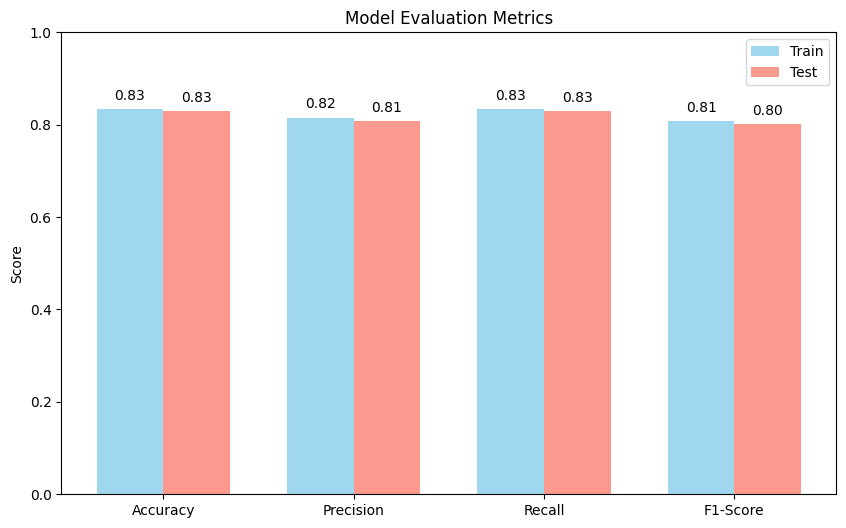

In [59]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Function to calculate and extract metrics for both train and test sets
def calculate_metrics(y_train, y_train_pred, y_test, y_test_pred):
    # Train metrics
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Test metrics
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot the metrics
def plot_metrics(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='skyblue', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='salmon', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title('Model Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Example: Logistic Regression Predictions
# Replace `y_train`, `y_train_pred`, `y_test`, `y_test_pred` with actual values
y_train_pred = log_reg.predict(X_train)  # Predictions for training data
y_test_pred = log_reg.predict(X_test)    # Predictions for test data

# Calculate metrics
metrics = calculate_metrics(y_train, y_train_pred, y_test, y_test_pred)

# Plot metrics
plot_metrics(metrics)


In [29]:
# Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Decision Tree Classification Report:\n", report_decision_tree)

Decision Tree Accuracy: 0.782
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8061
           1       0.44      0.48      0.46      1939

    accuracy                           0.78     10000
   macro avg       0.66      0.67      0.66     10000
weighted avg       0.79      0.78      0.79     10000



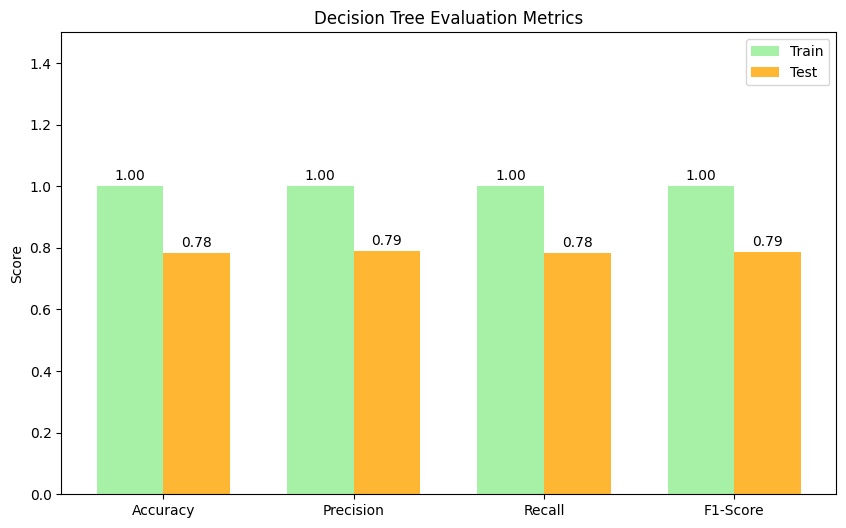

In [63]:
# Decision Tree Predictions
y_pred_train_decision_tree = decision_tree.predict(X_train)  # Train predictions
y_pred_test_decision_tree = decision_tree.predict(X_test)    # Test predictions

# Function to calculate metrics for the Decision Tree
def calculate_metrics_decision_tree(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for the Decision Tree
def plot_metrics_decision_tree(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='lightgreen', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='orange', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1.5)
    plt.title('Decision Tree Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for the Decision Tree
metrics_decision_tree = calculate_metrics_decision_tree(y_train, y_pred_train_decision_tree, y_test, y_pred_test_decision_tree)

# Plot metrics for the Decision Tree
plot_metrics_decision_tree(metrics_decision_tree)


In [30]:
# KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", report_knn)

KNN Accuracy: 0.8175
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      8061
           1       0.57      0.24      0.34      1939

    accuracy                           0.82     10000
   macro avg       0.70      0.60      0.62     10000
weighted avg       0.79      0.82      0.79     10000



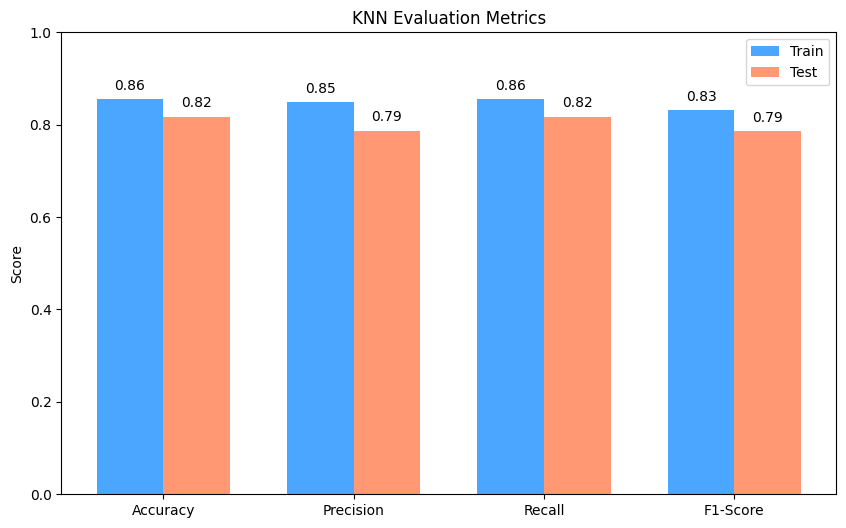

In [62]:
# KNN Predictions
y_pred_train_knn = knn.predict(X_train)  # Train predictions
y_pred_test_knn = knn.predict(X_test)   # Test predictions

# Function to calculate metrics for KNN
def calculate_metrics_knn(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for KNN
def plot_metrics_knn(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='dodgerblue', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='coral', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title('KNN Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for KNN
metrics_knn = calculate_metrics_knn(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

# Plot metrics for KNN
plot_metrics_knn(metrics_knn)


In [31]:
# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_knn)
print("XGBoost Classification Report:\n", report_xgb)

XGBoost Accuracy: 0.8175
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      8061
           1       0.81      0.31      0.45      1939

    accuracy                           0.85     10000
   macro avg       0.83      0.65      0.68     10000
weighted avg       0.85      0.85      0.83     10000



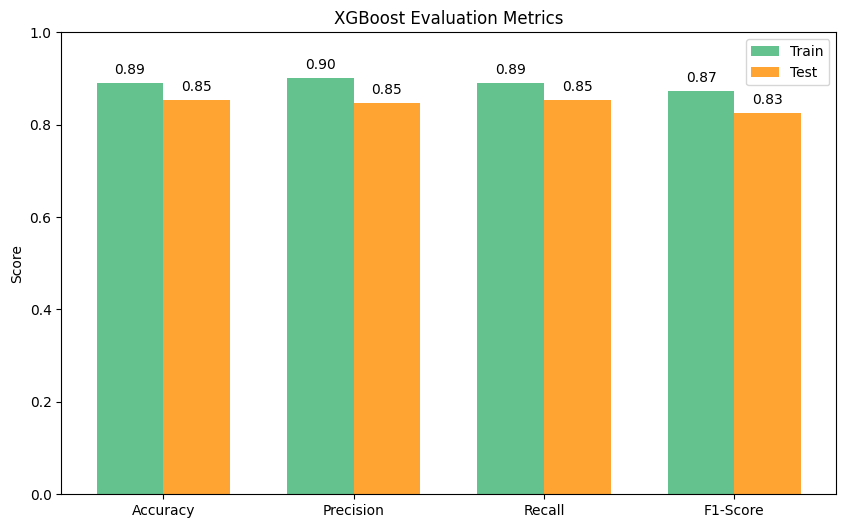

In [64]:
# XGBoost Predictions
y_pred_train_xgb = xgb_model.predict(X_train)  # Train predictions
y_pred_test_xgb = xgb_model.predict(X_test)   # Test predictions

# Function to calculate metrics for XGBoost
def calculate_metrics_xgb(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for XGBoost
def plot_metrics_xgb(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='mediumseagreen', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='darkorange', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title('XGBoost Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for XGBoost
metrics_xgb = calculate_metrics_xgb(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)

# Plot metrics for XGBoost
plot_metrics_xgb(metrics_xgb)


In [32]:
# Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_knn)
print("Random Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.8175
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8061
           1       0.86      0.29      0.44      1939

    accuracy                           0.85     10000
   macro avg       0.86      0.64      0.68     10000
weighted avg       0.85      0.85      0.82     10000



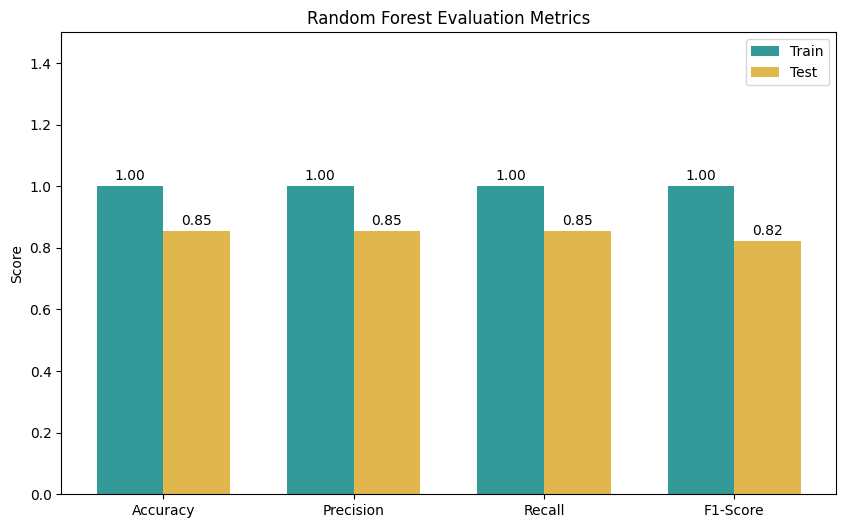

In [66]:
# Random Forest Predictions
y_pred_train_rf = rf_model.predict(X_train)  # Train predictions
y_pred_test_rf = rf_model.predict(X_test)   # Test predictions

# Function to calculate metrics for Random Forest
def calculate_metrics_rf(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for Random Forest
def plot_metrics_rf(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='teal', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='goldenrod', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1.5)
    plt.title('Random Forest Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for Random Forest
metrics_rf = calculate_metrics_rf(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

# Plot metrics for Random Forest
plot_metrics_rf(metrics_rf)


In [33]:
# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boost Accuracy:", accuracy_knn)
print("Gradient Boost Classification Report:\n", report_gb)

Gradient Boost Accuracy: 0.8175
Gradient Boost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8061
           1       0.92      0.29      0.44      1939

    accuracy                           0.86     10000
   macro avg       0.89      0.64      0.68     10000
weighted avg       0.87      0.86      0.83     10000



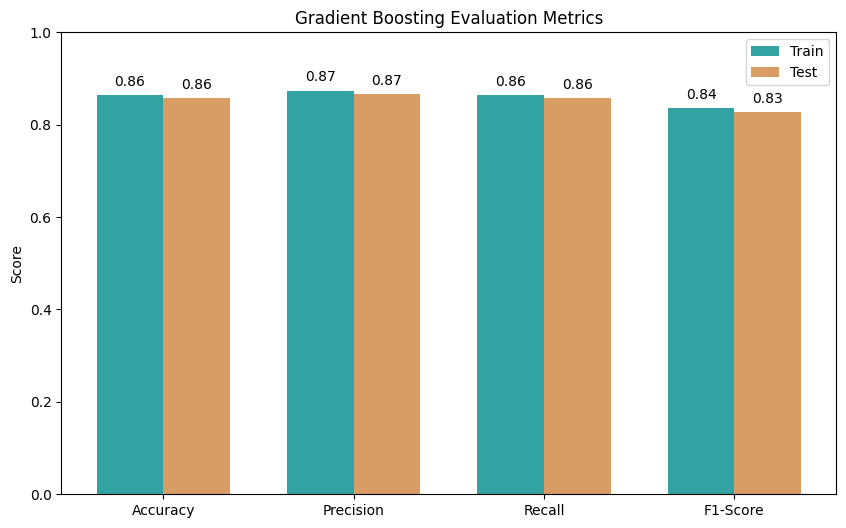

In [73]:
# Gradient Boosting Predictions
y_pred_train_gb = gb_model.predict(X_train)  # Train predictions
y_pred_test_gb = gb_model.predict(X_test)   # Test predictions

# Function to calculate metrics for Gradient Boosting
def calculate_metrics_gb(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for Gradient Boosting
def plot_metrics_gb(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='darkcyan', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='peru', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title('Gradient Boosting Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for Gradient Boosting
metrics_gb = calculate_metrics_gb(y_train, y_pred_train_gb, y_test, y_pred_test_gb)

# Plot metrics for Gradient Boosting
plot_metrics_gb(metrics_gb)


In [34]:
# Naive Bayes
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_knn)
print("Naive Bayes Classification Report:\n", report_nb)

Naive Bayes Accuracy: 0.8175
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      8061
           1       0.48      0.32      0.39      1939

    accuracy                           0.80     10000
   macro avg       0.66      0.62      0.63     10000
weighted avg       0.78      0.80      0.78     10000



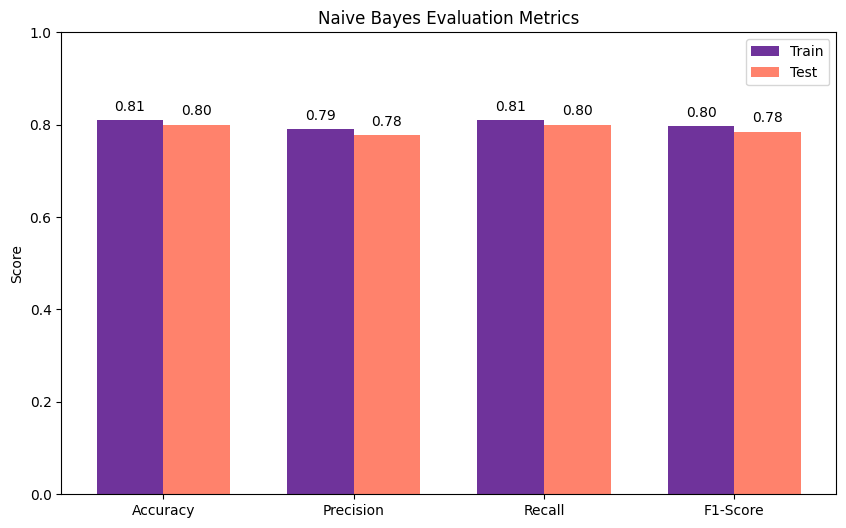

In [68]:
# Naive Bayes Predictions
y_pred_train_nb = nb_model.predict(X_train)  # Train predictions
y_pred_test_nb = nb_model.predict(X_test)   # Test predictions

# Function to calculate metrics for Naive Bayes
def calculate_metrics_nb(y_train, y_pred_train, y_test, y_pred_test):
    # Train metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Test metrics
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return {
        "Train": {"Accuracy": train_accuracy, "Precision": train_precision, "Recall": train_recall, "F1-Score": train_f1},
        "Test": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1}
    }

# Function to plot metrics for Naive Bayes
def plot_metrics_nb(metrics):
    labels = list(metrics["Train"].keys())  # Metric names
    train_values = list(metrics["Train"].values())
    test_values = list(metrics["Test"].values())
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label='Train', color='indigo', alpha=0.8)
    plt.bar(x + width/2, test_values, width, label='Test', color='tomato', alpha=0.8)
    
    # Add labels and titles
    plt.xticks(x, labels)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title('Naive Bayes Evaluation Metrics')
    plt.legend()
    
    # Add value annotations
    for i, v in enumerate(train_values):
        plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    
    plt.show()

# Calculate metrics for Naive Bayes
metrics_nb = calculate_metrics_nb(y_train, y_pred_train_nb, y_test, y_pred_test_nb)

# Plot metrics for Naive Bayes
plot_metrics_nb(metrics_nb)


In [35]:
# Step 5: Model Comparison - Selecting the Best Model
# Compare accuracies
model_accuracies = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": accuracy_decision_tree,
    "KNN": accuracy_knn,
    "XGBoost": accuracy_xgb,
    "Random Forest": accuracy_rf,
    "Gradient Boosting": accuracy_gb,
    "Naive Bayes": accuracy_nb
}

In [36]:
# Select the best model
best_model_name, best_accuracy = max(model_accuracies.items(), key=lambda x: x[1])
print("Model Accuracies:", model_accuracies)

Model Accuracies: {'Logistic Regression': 0.8302, 'Decision Tree': 0.782, 'KNN': 0.8175, 'XGBoost': 0.8524, 'Random Forest': 0.8539, 'Gradient Boosting': 0.8579, 'Naive Bayes': 0.8003}


In [37]:
# Save the best model
if best_model_name == "Gradient Boosting":
    joblib.dump(gb_model, 'best_diabetes_model.pkl')
elif best_model_name == "XGBoost":
    joblib.dump(xgb_model, 'best_diabetes_model.pkl')
elif best_model_name == "Random Forest":
    joblib.dump(rf_model, 'best_diabetes_model.pkl')
elif best_model_name == "Decision Tree":
    joblib.dump(decision_tree, 'best_diabetes_model.pkl')
elif best_model_name == "KNN":
    joblib.dump(knn, 'best_diabetes_model.pkl')
else:
    joblib.dump(log_reg, 'best_diabetes_model.pkl')

print(f"The best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}")

The best model is: Gradient Boosting with an accuracy of 0.86


In [38]:
# Update the `best_model` variable to the actual model object
if best_model_name == "Gradient Boosting":
    best_model = gb_model
elif best_model_name == "XGBoost":
    best_model = xgb_model
elif best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "Decision Tree":
    best_model = decision_tree
elif best_model_name == "KNN":
    best_model = knn
else:
    best_model = log_reg

In [39]:
def get_user_input():
    gender = input("Gender (Male/Female): ")
    age = float(input("Age: "))
    hypertension = int(input("Do you have hypertension? (1 for Yes, 0 for No): "))
    heart_disease = int(input("Do you have heart disease? (1 for Yes, 0 for No): "))
    
    # Update smoking history input to accept 0, 1, or 2
    smoking_history = -1
    while smoking_history not in [0, 1, 2]:  # Ensure valid input
        smoking_history = int(input("Do you smoke? (0 for Never, 1 for Current Smoker, 2 for Former Smoker): "))
    
    bmi = float(input("BMI: "))
    hbA1c_level = float(input("HbA1c level: "))
    blood_glucose_level = float(input("Blood glucose level: "))
    
    # Skip pregnancies question if gender is Male
    if gender.lower() == 'female':
        pregnancies = int(input("Number of pregnancies: "))
    else:
        pregnancies = 0  # Default value for males

    blood_pressure = float(input("Blood pressure level: "))
    genetic = int(input("Genetic history of diabetes? (1 for Yes, 0 for No): "))
    cholesterol = float(input("Cholesterol level: "))

    # Preprocess the user input to match the trained model
    # Ensure label encoder classes align with input values
    label_encoder_gender = LabelEncoder()
    label_encoder_gender.classes_ = np.array(['Female', 'Male'])  # Assuming these are the original values

    gender = label_encoder_gender.transform([gender])[0]

    # Directly use the smoking history as a numeric value (0, 1, or 2)
    user_data = np.array([[gender, age, hypertension, heart_disease, smoking_history,
                           bmi, hbA1c_level, blood_glucose_level, pregnancies,
                           blood_pressure, genetic, cholesterol]])
    
    return user_data

In [40]:
user_data = get_user_input()
prediction = best_model.predict(user_data)

if prediction == 1:
    print("You are prone to diabetes. Here are some health tips to manage your risk:")
    print("- Maintain a healthy diet with low sugar and carbs.")
    print("- Exercise regularly (30 minutes per day).")
    print("- Regularly monitor your blood glucose levels.")
else:
    print("You are not prone to diabetes.")

Gender (Male/Female):  Male
Age:  20
Do you have hypertension? (1 for Yes, 0 for No):  0
Do you have heart disease? (1 for Yes, 0 for No):  0
Do you smoke? (0 for Never, 1 for Current Smoker, 2 for Former Smoker):  0
BMI:  20
HbA1c level:  40
Blood glucose level:  60
Blood pressure level:  130
Genetic history of diabetes? (1 for Yes, 0 for No):  0
Cholesterol level:  200


You are prone to diabetes. Here are some health tips to manage your risk:
- Maintain a healthy diet with low sugar and carbs.
- Exercise regularly (30 minutes per day).
- Regularly monitor your blood glucose levels.


C:\Users\Saksham Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


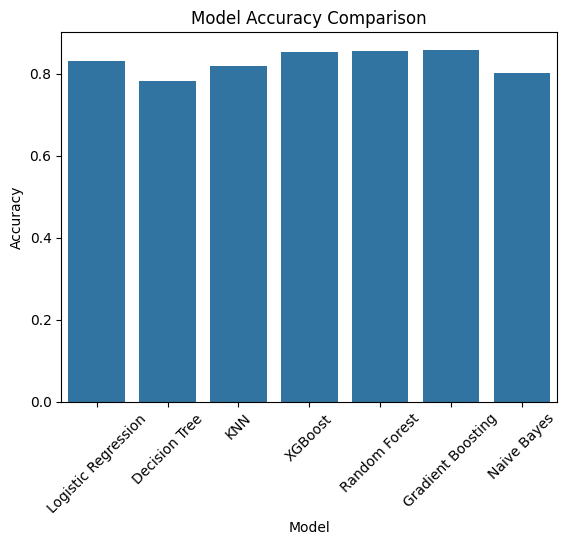

In [41]:
accuracy_data = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': list(model_accuracies.values())
})
sns.barplot(x='Model', y='Accuracy', data=accuracy_data)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

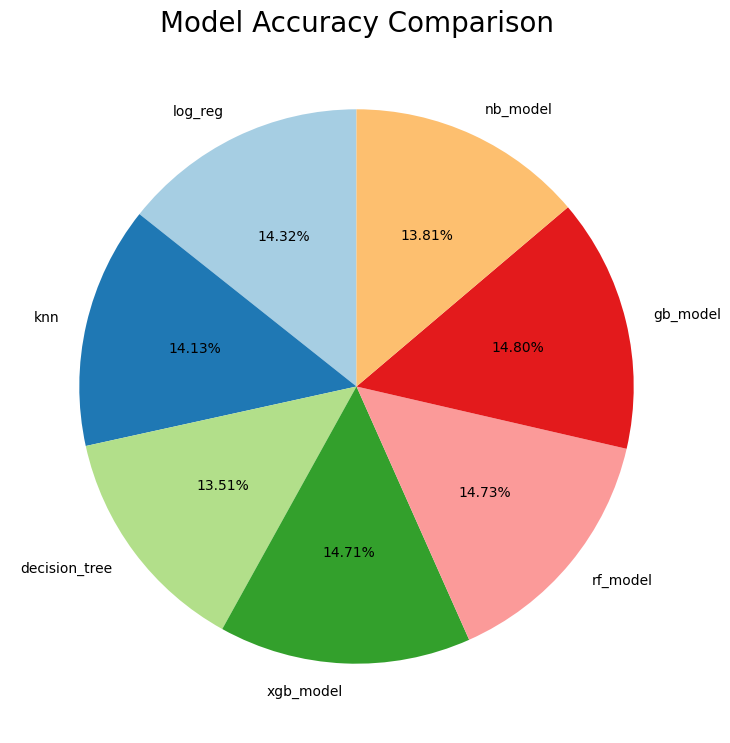

In [42]:
# Accuracy data for models
models = ['log_reg', 'knn', 'decision_tree', 'xgb_model', 'rf_model', 'gb_model', 'nb_model']
accuracies = [0.8299, 0.8188, 0.7831, 0.8524, 0.8538, 0.8579, 0.8003]

# Plotting the pie chart
plt.figure(figsize=(9, 9))
plt.pie(accuracies, labels=models, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adding title
plt.title('Model Accuracy Comparison', fontsize=20)

# Display the pie chart
plt.show()

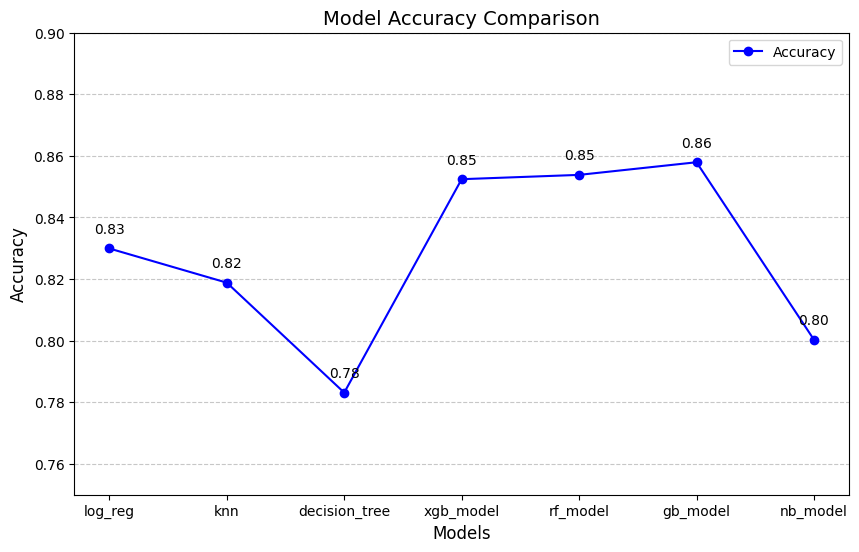

In [43]:
models = ['log_reg', 'knn', 'decision_tree', 'xgb_model', 'rf_model', 'gb_model', 'nb_model']
accuracies = [0.8299, 0.8188, 0.7831, 0.8524, 0.8538, 0.8579, 0.8003]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

# Annotate each point with its accuracy
for i, accuracy in enumerate(accuracies):
    plt.text(models[i], accuracy + 0.005, f'{accuracy:.2f}', ha='center', fontsize=10)

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.75, 0.9)  # Adjust the y-axis limits to fit your data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

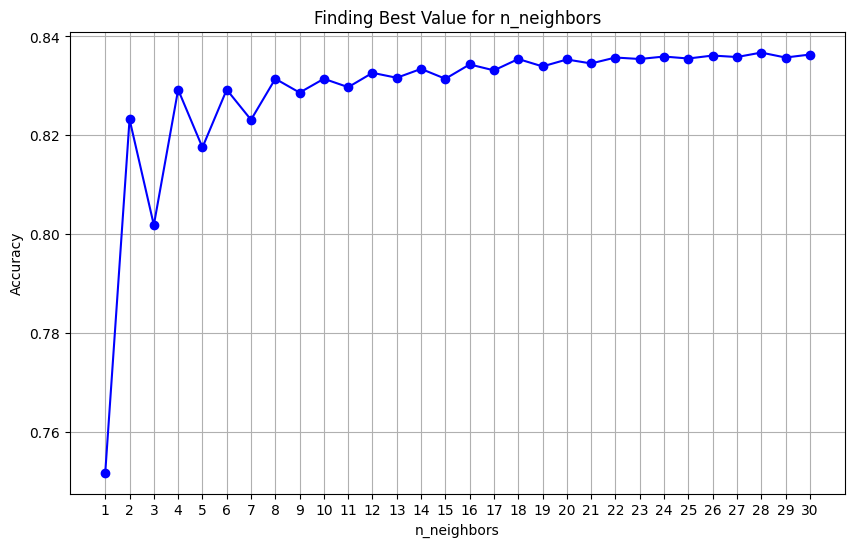

Highest Accuracy: 0.8367 at n_neighbors = 28


In [44]:
# Initialize variables
X_axis = list(range(1, 31))  # Range of n_neighbors to test
accuracies = []  # To store accuracy for each n_neighbors value

# Loop through values of n_neighbors
for i in X_axis:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)  # Train the model
    predictions = knn_model.predict(X_test)  # Predict on test data
    accuracies.append(metrics.accuracy_score(y_test, predictions))  # Compute accuracy

# Convert accuracies to a pandas Series for easy handling
accuracy_series = pd.Series(accuracies, index=X_axis)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(X_axis, accuracies, marker='o', linestyle='-', color='b')
plt.xticks(X_axis)
plt.title("Finding Best Value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Print the highest accuracy and corresponding n_neighbors value
best_accuracy = max(accuracies)
best_n_neighbors = accuracies.index(best_accuracy) + 1  # Add 1 since Python indices start at 0
print(f'Highest Accuracy: {best_accuracy:.4f} at n_neighbors = {best_n_neighbors}')

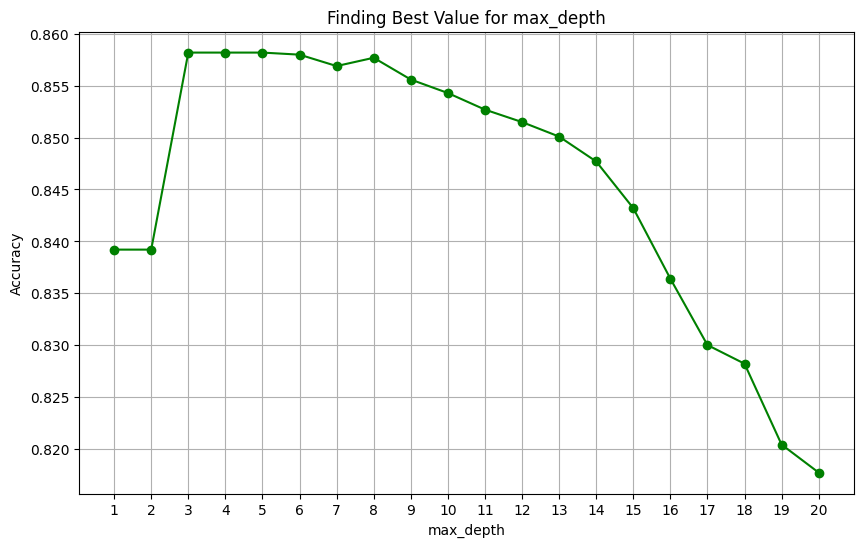

Highest Accuracy: 0.8582 at max_depth = 3


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

# Initialize variables
X_axis = list(range(1, 21))  # Range of max_depth to test (can be adjusted)
accuracies = []  # To store accuracy for each max_depth value

# Loop through values of max_depth
for i in X_axis:
    dt_model = DecisionTreeClassifier(max_depth=i)  # Initialize the model with current max_depth
    dt_model.fit(X_train, y_train)  # Train the model
    predictions = dt_model.predict(X_test)  # Predict on test data
    accuracies.append(metrics.accuracy_score(y_test, predictions))  # Compute accuracy

# Convert accuracies to a pandas Series for easy handling
accuracy_series = pd.Series(accuracies, index=X_axis)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(X_axis, accuracies, marker='o', linestyle='-', color='g')
plt.xticks(X_axis)
plt.title("Finding Best Value for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Print the highest accuracy and corresponding max_depth value
best_accuracy = max(accuracies)
best_max_depth = accuracies.index(best_accuracy) + 1  # Add 1 since Python indices start at 0
print(f'Highest Accuracy: {best_accuracy:.4f} at max_depth = {best_max_depth}')


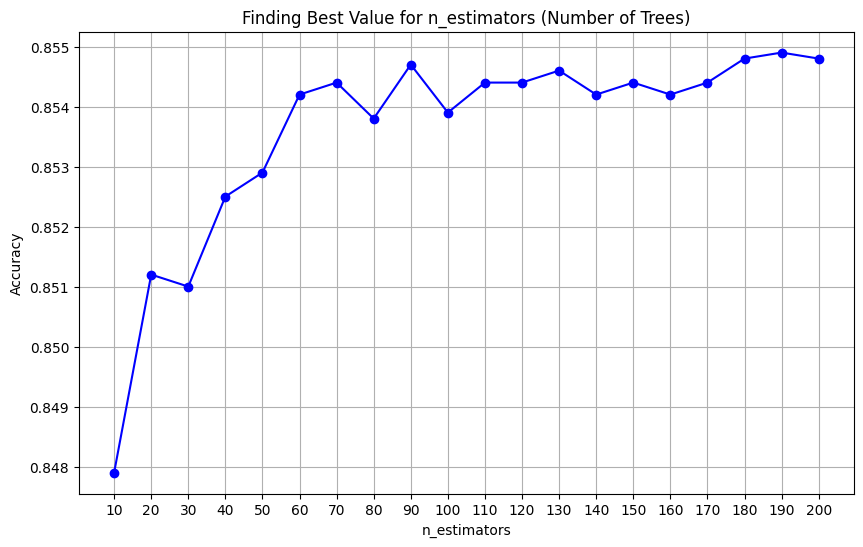

Highest Accuracy: 0.8549 at n_estimators = 190


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

# Initialize variables
X_axis = list(range(10, 201, 10))  # Range of n_estimators to test (from 10 to 200, step 10)
accuracies = []  # To store accuracy for each n_estimators value

# Loop through values of n_estimators
for i in X_axis:
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)  # Initialize the model with current n_estimators
    rf_model.fit(X_train, y_train)  # Train the model
    predictions = rf_model.predict(X_test)  # Predict on test data
    accuracies.append(metrics.accuracy_score(y_test, predictions))  # Compute accuracy

# Convert accuracies to a pandas Series for easy handling
accuracy_series = pd.Series(accuracies, index=X_axis)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(X_axis, accuracies, marker='o', linestyle='-', color='b')
plt.xticks(X_axis)
plt.title("Finding Best Value for n_estimators (Number of Trees)")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Print the highest accuracy and corresponding n_estimators value
best_accuracy = max(accuracies)
best_n_estimators = accuracies.index(best_accuracy) + 1  # Add 1 since Python indices start at 0
print(f'Highest Accuracy: {best_accuracy:.4f} at n_estimators = {X_axis[best_n_estimators - 1]}')


In [45]:
df[numeric_features] = scaler.inverse_transform(df[numeric_features])
df.corr()

gender       age  hypertension  heart_disease  \
gender               1.000000 -0.015407      0.011123       0.071783   
age                 -0.015407  1.000000      0.237885       0.230362   
hypertension         0.011123  0.237885      1.000000       0.112386   
heart_disease        0.071783  0.230362      0.112386       1.000000   
smoking_history      0.034931  0.141574      0.051667       0.054271   
bmi                 -0.022357  0.225068      0.142860       0.062565   
hbA1c_level          0.021888  0.099157      0.085654       0.074137   
blood_glucose_level  0.017297  0.106008      0.084855       0.074515   
Pregnancies         -0.853425  0.248069      0.032767      -0.039390   
blood_pressure      -0.000974  0.152269      0.634851       0.071366   
genetic             -0.000074  0.227317      0.063303       0.063368   
cholesterol          0.021016  0.073604      0.032113       0.324303   
diabetes             0.022869  0.212828      0.141197       0.124864   

                     smoking_history       bmi  hbA1c_level  \
gender                      0.034931 -0.022357     0.021888   
age                         0.141574  0.225068     0.099157   
hypertension                0.051667  0.142860     0.085654   
heart_disease               0.054271  0.062565     0.074137   
smoking_history             1.000000  0.108549     0.030104   
bmi                         0.108549  1.000000     0.087900   
hbA1c_level                 0.030104  0.087900     1.000000   
blood_glucose_level         0.034143  0.092003     0.167788   
Pregnancies                 0.020850  0.128370    -0.002821   
blood_pressure              0.028973  0.091601     0.056645   
genetic                     0.033914  0.057828     0.027399   
cholesterol                 0.008947  0.017339     0.021789   
diabetes                    0.052471  0.146068     0.252631   

                     blood_glucose_level  Pregnancies  blood_pressure  \
gender                          0.017297    -0.853425       -0.000974   
age                             0.106008     0.248069        0.152269   
hypertension                    0.084855     0.032767        0.634851   
heart_disease                   0.074515    -0.039390        0.071366   
smoking_history                 0.034143     0.020850        0.028973   
bmi                             0.092003     0.128370        0.091601   
hbA1c_level                     0.167788    -0.002821        0.056645   
blood_glucose_level             1.000000     0.004725        0.055110   
Pregnancies                     0.004725     1.000000        0.027594   
blood_pressure                  0.055110     0.027594        1.000000   
genetic                         0.030245     0.034929        0.033050   
cholesterol                     0.024209    -0.013133        0.019022   
diabetes                        0.260927     0.015220        0.086036   

                      genetic  cholesterol  diabetes  
gender              -0.000074     0.021016  0.022869  
age                  0.227317     0.073604  0.212828  
hypertension         0.063303     0.032113  0.141197  
heart_disease        0.063368     0.324303  0.124864  
smoking_history      0.033914     0.008947  0.052471  
bmi                  0.057828     0.017339  0.146068  
hbA1c_level          0.027399     0.021789  0.252631  
blood_glucose_level  0.030245     0.024209  0.260927  
Pregnancies          0.034929    -0.013133  0.015220  
blood_pressure       0.033050     0.019022  0.086036  
genetic              1.000000     0.014235  0.318510  
cholesterol          0.014235     1.000000  0.043608  
diabetes             0.318510     0.043608  1.000000

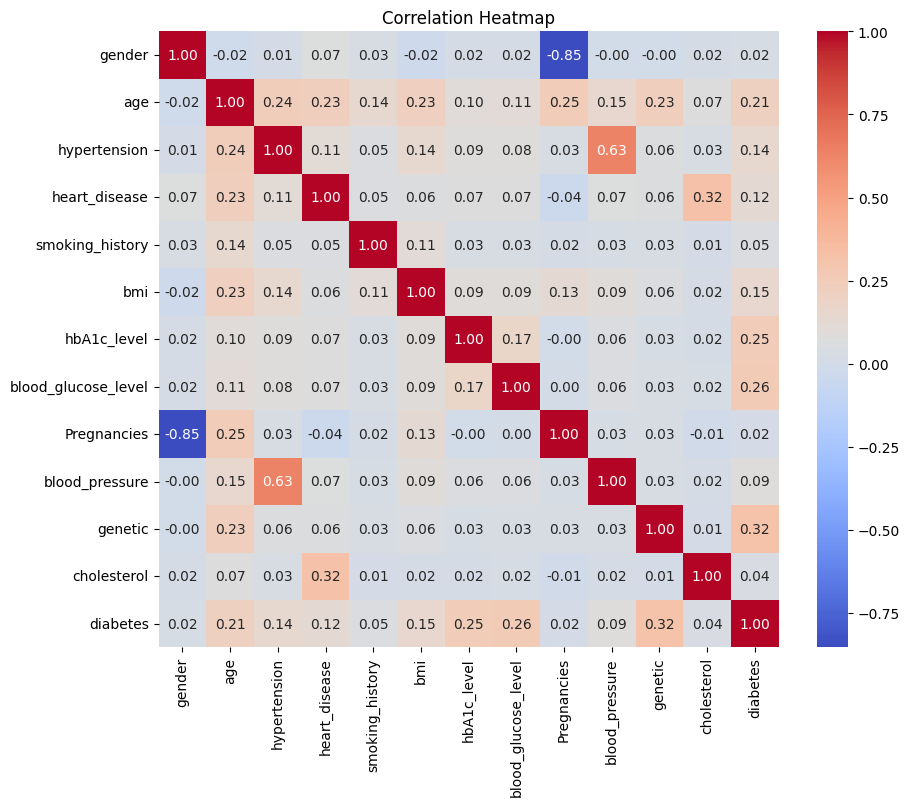

In [46]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Saksham Gupta\AppData\Local\Temp\ipykernel_17668\2284357786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


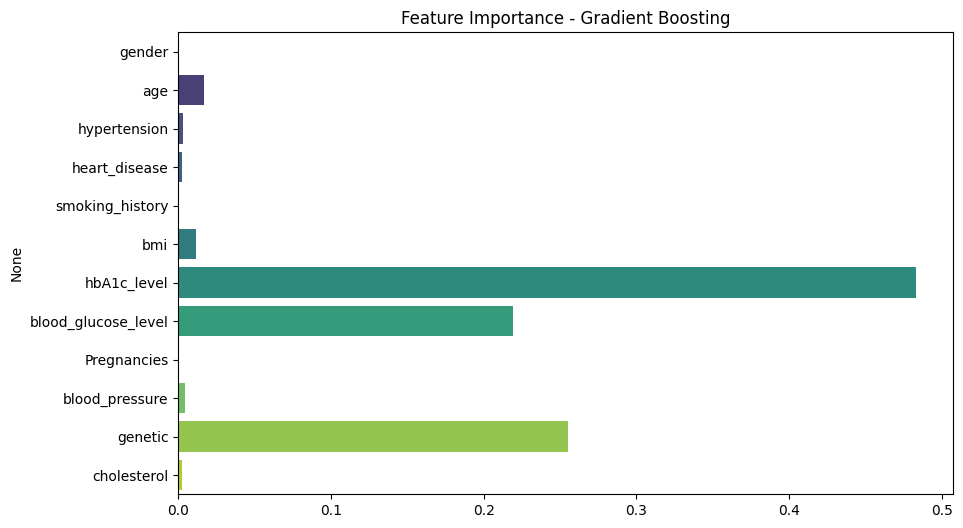

In [47]:
# Feature Importance (for tree-based models)
if best_model_name in ["Decision Tree", "Random Forest", "XGBoost", "Gradient Boosting"]:
    feature_importance = best_model.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=features, palette="viridis")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()

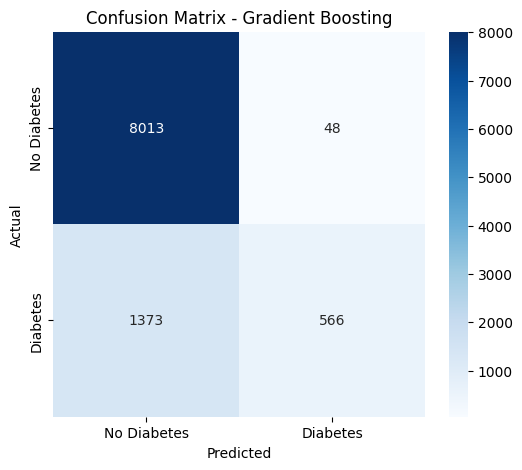

In [48]:
# Confusion Matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

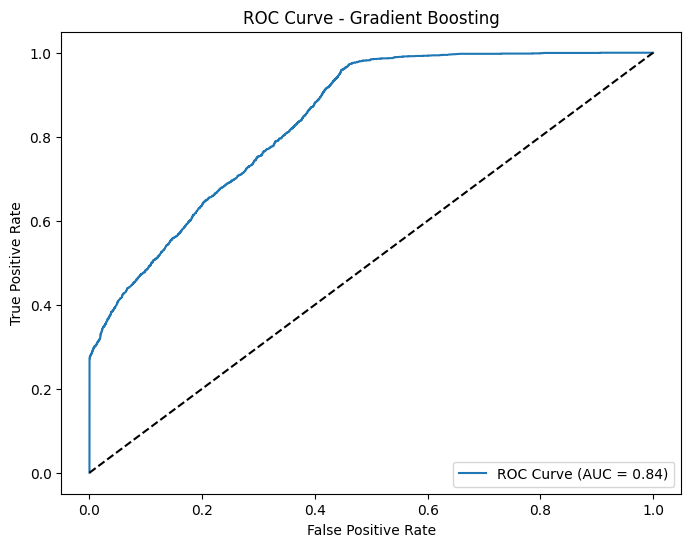

In [49]:
# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None
if y_pred_prob is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {best_model_name}")
    plt.legend(loc="lower right")
    plt.show()

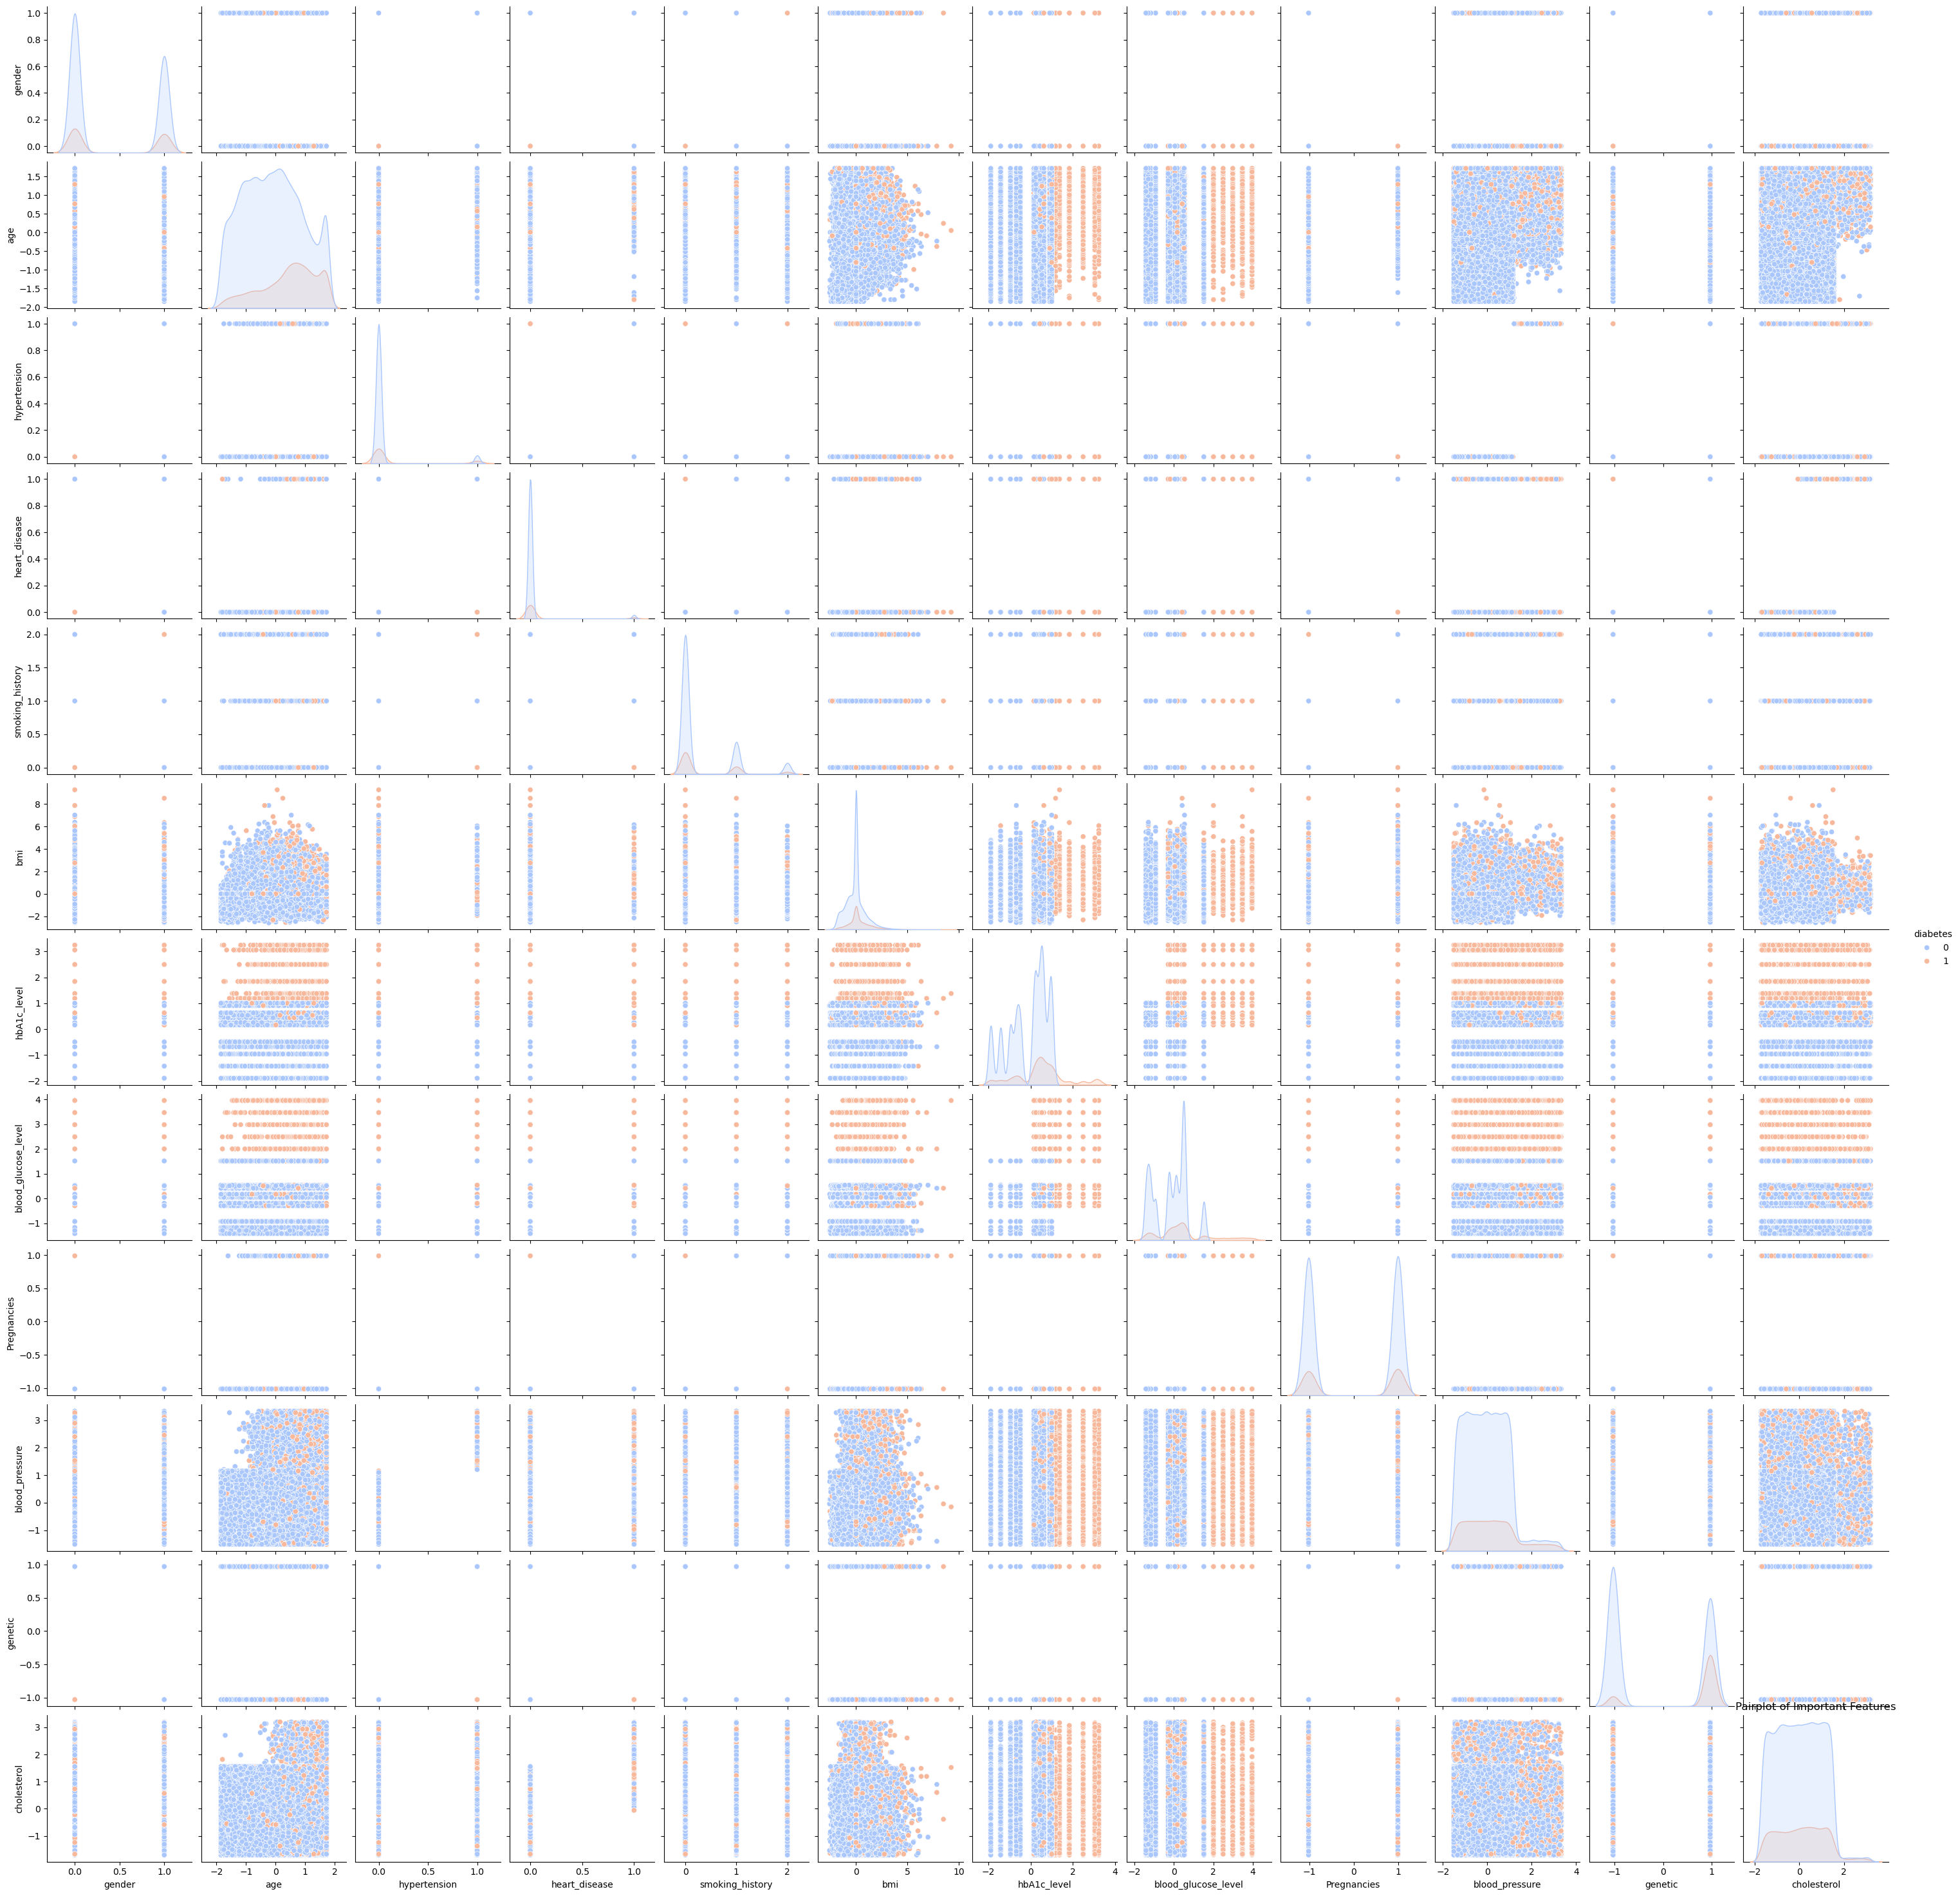

In [48]:
# Pairplot of Features
important_features = ['gender','age','hypertension','heart_disease','smoking_history','bmi','hbA1c_level','blood_glucose_level','Pregnancies','blood_pressure','genetic','cholesterol']  # Adjust based on importance
sns.pairplot(df, vars=important_features, hue="diabetes", palette="coolwarm", diag_kind="kde")
plt.title("Pairplot of Important Features")
plt.show()

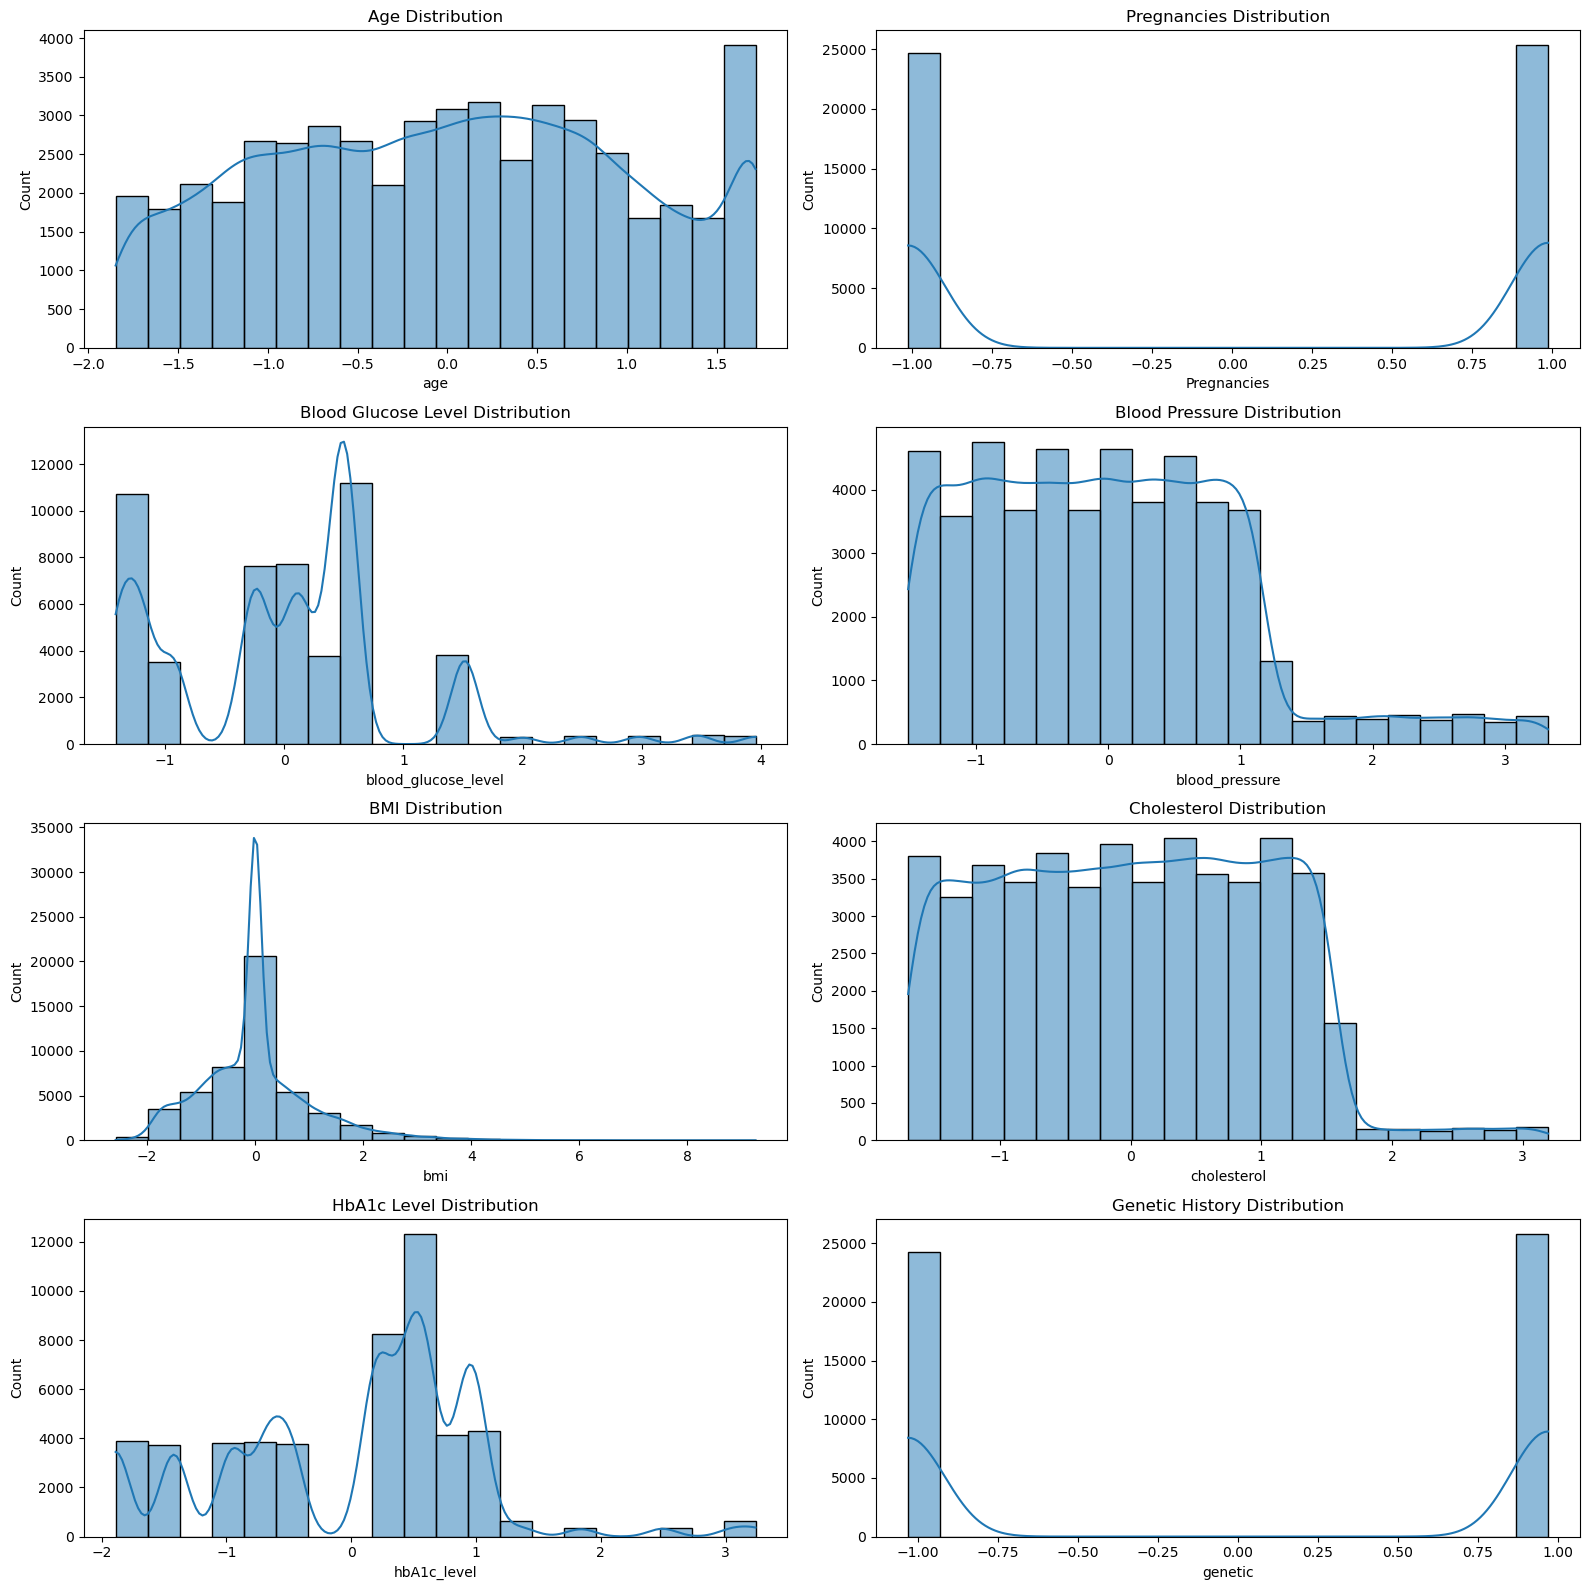

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot for each variable
sns.histplot(df['age'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

sns.histplot(df['Pregnancies'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Pregnancies Distribution')

sns.histplot(df['blood_glucose_level'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Blood Glucose Level Distribution')

sns.histplot(df['blood_pressure'], bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Blood Pressure Distribution')

sns.histplot(df['bmi'], bins=20, kde=True, ax=ax[2, 0])
ax[2, 0].set_title('BMI Distribution')

sns.histplot(df['cholesterol'], bins=20, kde=True, ax=ax[2, 1])
ax[2, 1].set_title('Cholesterol Distribution')

sns.histplot(df['hbA1c_level'], bins=20, kde=True, ax=ax[3, 0])
ax[3, 0].set_title('HbA1c Level Distribution')

sns.histplot(df['genetic'], bins=20, kde=True, ax=ax[3, 1])
ax[3, 1].set_title('Genetic History Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Sarthak Rana\AppData\Local\Temp\ipykernel_22048\1917937573.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


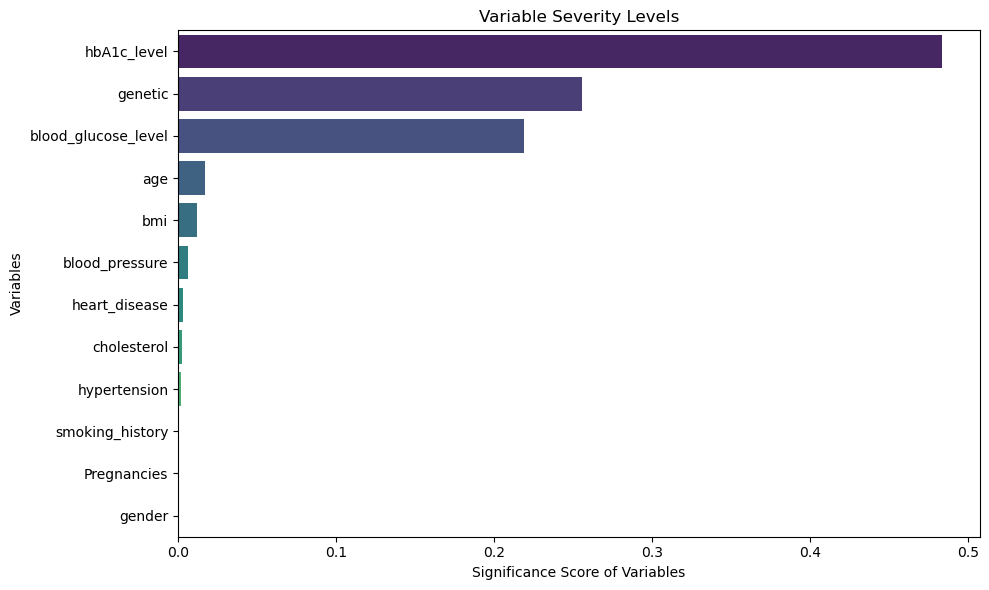

In [75]:
# Assuming `best_model` is your trained Gradient Boosting model or similar
# and X.columns contains feature names
if hasattr(best_model, 'feature_importances_'):
    # Extract feature importances
    feature_importance = best_model.feature_importances_
    features = X.columns

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
    plt.title('Variable Severity Levels')
    plt.xlabel('Significance Score of Variables')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()
else:
    print("The selected model does not provide feature importance scores.")

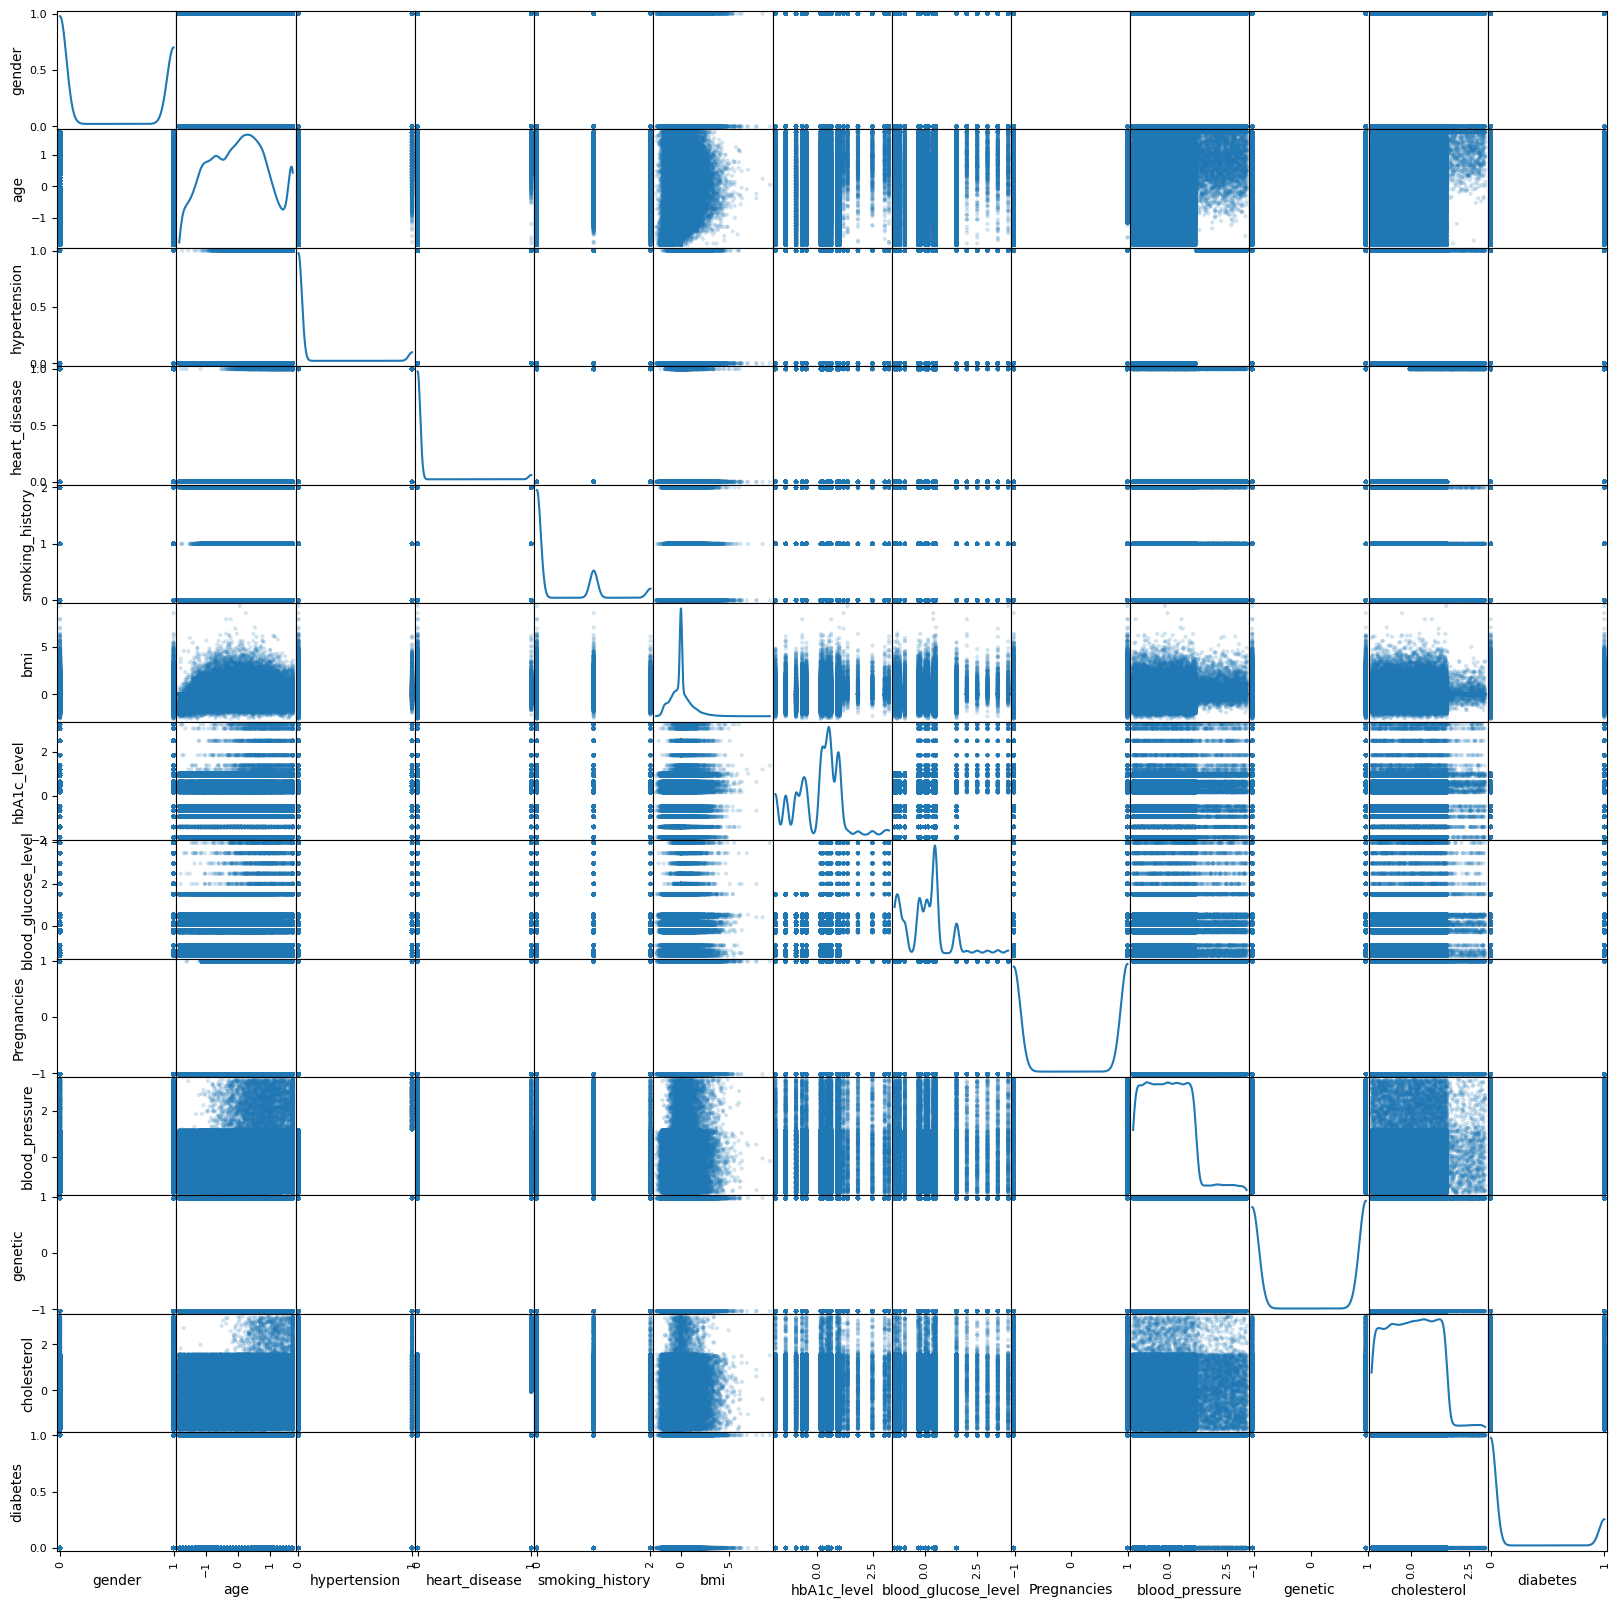

In [43]:
# Scatter plot matrix 
scatter_matrix(df,figsize=(20, 20), diagonal='kde', alpha=0.2);